In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import os

# Cargar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Parámetros
BATCH_SIZE = 64
IMAGE_SIZE = (227, 227)  # AlexNet espera 227x227

# Función de preprocesamiento (redimensiona imágenes y normaliza)
def preprocess_image(image, label):
    image = tf.image.resize(image, IMAGE_SIZE) / 255.0  # Normalización
    return image, label

# Crear datasets con `tf.data.Dataset`
train_dataset = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

test_dataset = (
    tf.data.Dataset.from_tensor_slices((x_test, y_test))
    .map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.experimental.AUTOTUNE)
)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, ReLU, Dropout

def create_alexnet():
    model = Sequential([
        # Capa 1: Conv + ReLU + Pool
        Conv2D(96, (11, 11), strides=4, padding="same", input_shape=(227, 227, 3)),
        ReLU(),
        MaxPooling2D(pool_size=(3, 3), strides=2),

        # Capa 2: Conv + ReLU + Pool
        Conv2D(256, (5, 5), padding="same"),
        ReLU(),
        MaxPooling2D(pool_size=(3, 3), strides=2),

        # Capas 3, 4, 5: Conv + ReLU
        Conv2D(384, (3, 3), padding="same"),
        ReLU(),
        Conv2D(384, (3, 3), padding="same"),
        ReLU(),
        Conv2D(256, (3, 3), padding="same"),
        ReLU(),
        MaxPooling2D(pool_size=(3, 3), strides=2),

        # Aplanar
        Flatten(),

        # Capas densas
        Dense(4096),
        ReLU(),
        Dropout(0.5),
        Dense(4096),
        ReLU(),
        Dropout(0.5),

        # Capa de salida con 10 clases (CIFAR-10)
        Dense(10, activation="softmax")
    ])
    return model

In [3]:
# Ruta del archivo de pesos
#WEIGHTS_PATH = "alexnet_weights.h5"
WEIGHTS_PATH = "alexnet_weights.weights.h5"

# Crear modelo
model = create_alexnet()

# Verificar si existe un modelo preentrenado
if os.path.exists(WEIGHTS_PATH):
    print("🔹 Cargando pesos preentrenados...")
    model.load_weights(WEIGHTS_PATH)
else:
    print("🔹 Entrenando desde cero...")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🔹 Entrenando desde cero...


In [ ]:
# Compilar modelo
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Entrenar solo si no hay pesos preentrenados
if not os.path.exists(WEIGHTS_PATH):
    model.fit(train_dataset, epochs=15, validation_data=test_dataset)

    # Guardar pesos entrenados
    model.save_weights(WEIGHTS_PATH)
    print(f"✅ Pesos guardados en {WEIGHTS_PATH}")

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 94ms/step - accuracy: 0.2243 - loss: 2.0987 - val_accuracy: 0.4170 - val_loss: 1.6363
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 83ms/step - accuracy: 0.4559 - loss: 1.4988 - val_accuracy: 0.5105 - val_loss: 1.3369
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.5141 - loss: 1.3432 - val_accuracy: 0.5384 - val_loss: 1.2644
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.5573 - loss: 1.2373 - val_accuracy: 0.5884 - val_loss: 1.1466
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.5907 - loss: 1.1487 - val_accuracy: 0.6227 - val_loss: 1.0779
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.6215 - loss: 1.0653 - val_accuracy: 0.6196 - val_loss: 1.0860
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.6450 - loss: 1.0090 - val_accuracy: 0.6384 - val_loss: 1.0577
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 91ms/step - accuracy: 0.6644 - loss: 0.9507 -

In [ ]:
import numpy as np
np.argmax(model.predict(test_dataset)[0])

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step


7

In [ ]:
import pandas as pd

pd.values(y_test)

AttributeError: module 'pandas' has no attribute 'values'

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
# Ruta del archivo de pesos
WEIGHTS_PATH = "alexnet_weights.h5"  # Changed file extension to .h5
#WEIGHTS_PATH = "alexnet_weights.weights.h5"

# Crear modelo
model = create_alexnet()

# Verificar si existe un modelo preentrenado
if os.path.exists(WEIGHTS_PATH):
    print("🔹 Cargando pesos preentrenados...")
    model.load_weights(WEIGHTS_PATH) # Loads weights from the file if it exists.
else:
    print("🔹 Entrenando desde cero...")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🔹 Entrenando desde cero...


In [ ]:
# Cargar dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]], dtype=uint8)
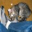

In [ ]:
x_test[0]

In [ ]:
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
im=tf.image.resize(x_test[211], IMAGE_SIZE) / 255.0

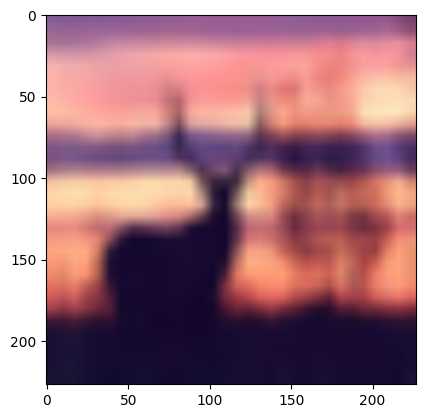

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(im)

In [ ]:
np.argmax(model.predict(np.expand_dims(im, axis=0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


9

array([[[155, 156, 149],
        [167, 176, 187],
        [176, 179, 193],
        ...,
        [201, 196, 209],
        [202, 202, 212],
        [192, 183, 171]],

       [[153, 155, 157],
        [163, 179, 204],
        [171, 184, 215],
        ...,
        [202, 208, 222],
        [203, 215, 227],
        [189, 190, 183]],

       [[155, 154, 153],
        [160, 178, 201],
        [168, 185, 213],
        ...,
        [206, 208, 215],
        [204, 215, 224],
        [189, 191, 184]],

       ...,

       [[ 89,  79,  62],
        [ 57,  53,  52],
        [ 61,  61,  59],
        ...,
        [ 89, 119, 101],
        [ 59,  79,  62],
        [ 67,  74,  50]],

       [[ 89,  82,  62],
        [ 60,  58,  53],
        [ 63,  66,  58],
        ...,
        [ 57,  66,  58],
        [ 61,  64,  54],
        [ 75,  69,  51]],

       [[ 92,  78,  64],
        [ 60,  52,  51],
        [ 61,  58,  51],
        ...,
        [ 60,  63,  50],
        [ 64,  65,  52],
        [ 73,  68,  50]]], dtype=uint8)
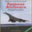

In [ ]:
x_test[3]

array([[[255, 255, 251],
        [252, 253, 248],
        [251, 252, 247],
        ...,
        [254, 255, 250],
        [253, 254, 249],
        [254, 255, 250]],

       [[251, 253, 248],
        [248, 249, 244],
        [210, 208, 205],
        ...,
        [251, 253, 248],
        [251, 252, 247],
        [252, 253, 248]],

       [[250, 253, 248],
        [248, 249, 245],
        [190, 183, 181],
        ...,
        [252, 254, 249],
        [251, 252, 247],
        [252, 252, 248]],

       ...,

       [[195, 177, 166],
        [185, 168, 157],
        [180, 162, 151],
        ...,
        [162, 146, 135],
        [172, 154, 143],
        [178, 156, 147]],

       [[204, 177, 157],
        [200, 173, 153],
        [200, 173, 153],
        ...,
        [171, 147, 130],
        [180, 156, 139],
        [187, 161, 145]],

       [[207, 178, 157],
        [208, 180, 158],
        [208, 179, 158],
        ...,
        [191, 163, 144],
        [197, 170, 151],
        [203, 176, 157]]], dtype=uint8)
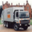

In [ ]:
x_test[11]

In [ ]:
im=tf.image.resize(x_test[3], IMAGE_SIZE) / 255.0

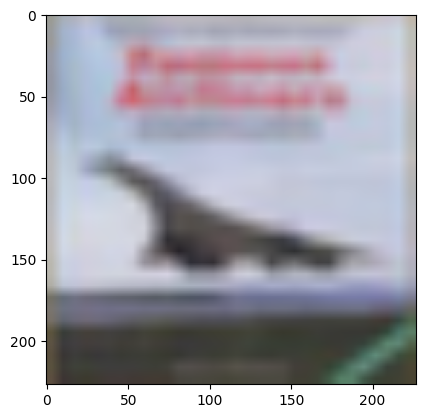

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(im)

In [ ]:
np.argmax(model.predict(np.expand_dims(im, axis=0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


0

In [ ]:
import numpy as np
categories[np.argmax(model.predict(np.expand_dims(im, axis=0)))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'deer'

In [ ]:
# Esto es para agregar un corchete. Importante, debe ser array o tensor, no lista.
import numpy as np
categories[np.argmax(model.predict(np.array([im])))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'deer'

In [ ]:
im

<tf.Tensor: shape=(227, 227, 3), dtype=float32, numpy=
array([[[0.5294118 , 0.37254903, 0.5921569 ],
        [0.5294118 , 0.37254903, 0.5921569 ],
        [0.5294118 , 0.37254903, 0.5921569 ],
        ...,
        [0.46666667, 0.2627451 , 0.44313726],
        [0.46666667, 0.2627451 , 0.44313726],
        [0.46666667, 0.2627451 , 0.44313726]],

       [[0.5294118 , 0.37254903, 0.5921569 ],
        [0.5294118 , 0.37254903, 0.5921569 ],
        [0.5294118 , 0.37254903, 0.5921569 ],
        ...,
        [0.46666667, 0.2627451 , 0.44313726],
        [0.46666667, 0.2627451 , 0.44313726],
        [0.46666667, 0.2627451 , 0.44313726]],

       [[0.5294118 , 0.37254903, 0.5921569 ],
        [0.5294118 , 0.37254903, 0.5921569 ],
        [0.5294118 , 0.37254903, 0.5921569 ],
        ...,
        [0.46666667, 0.2627451 , 0.44313726],
        [0.46666667, 0.2627451 , 0.44313726],
        [0.46666667, 0.2627451 , 0.44313726]],

       ...,

       [[0.09803922, 0.07058824, 0.20784314],
        [0.09

In [ ]:
imexp=np.expand_dims(im, axis=0)

In [ ]:
imexp.shape

(1, 227, 227, 3)